**Importing libraries:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

**Load the cleaned train data:**

In [2]:
df = pd.read_csv('../data/train_clean.csv')


**Describe the basic format:**

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [4]:
df.shape


(2048, 36)

In [5]:
df.dtypes


Unnamed: 0        int64
ms_subclass       int64
ms_zoning         int64
street            int64
alley             int64
land_contour      int64
utilities         int64
lot_config        int64
neighborhood      int64
condition_1       int64
bldg_type         int64
house_style       int64
overall_qual      int64
exter_qual        int64
foundation        int64
bsmt_cond         int64
heating_qc        int64
central_air       int64
bsmt_full_bath    int64
bsmt_half_bath    int64
full_bath         int64
half_bath         int64
bedroom_abvgr     int64
kitchen_abvgr     int64
totrms_abvgrd     int64
functional        int64
fireplaces        int64
garage_type       int64
garage_cars       int64
garage_qual       int64
paved_drive       int64
enclosed_porch    int64
pool_area         int64
mo_sold           int64
yr_sold           int64
saleprice         int64
dtype: object

**Looks like an extra column has been added, column Unnamed: 0  will be dropped.**

In [6]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)


,ms_subclass,ms_zoning,street,alley,land_contour,utilities,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,exter_qual,foundation,bsmt_cond,heating_qc,central_air,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_cars,garage_qual,paved_drive,enclosed_porch,pool_area,mo_sold,yr_sold,saleprice
0,60,0,0,0,0,0,2,11,1,0,1,6,1,0,2,3,0,0,0,2,1,3,1,9,0,0,1,2,1,1,0,0,3,2010,130500
1,60,0,0,0,0,0,2,10,0,0,1,7,1,1,2,3,0,1,0,2,1,4,1,11,0,1,1,2,1,1,0,0,4,2009,220000
2,20,0,0,0,0,0,1,0,0,0,0,5,0,0,2,1,0,1,0,1,0,3,1,6,0,0,2,1,1,1,0,0,1,2010,109000
3,60,0,0,0,0,0,1,23,0,0,1,5,0,1,2,2,0,0,0,2,1,3,1,10,0,0,3,2,1,1,0,0,4,2010,174000
4,50,0,0,0,0,0,1,10,0,0,3,6,0,1,1,1,0,0,0,2,0,3,1,8,0,0,2,2,1,0,0,0,3,2010,138500


**Create our features matrix for the Train/Test Split Model**

The objective of this output is to predict salesprice, columns that correlate best are garage_cars, fireplaces, totrms_abvgrd, full_bath, heating_qc, exter_qual & overall_qaul. These columns have a .45 correlation and higher and will be used in the saved pickle model as parameters.

In [7]:
features = ['overall_qual',      
            'exter_qual',        
            'heating_qc',        
            'full_bath',         
            'totrms_abvgrd',     
            'fireplaces',        
            'garage_cars',]
X = df[features]


**Description of the columns and values in the seven most correlated columns:**

- Column Explanation
    - garage_cars = Size of garage in car capacity
    - fireplaces = Number of fireplaces
    - totrms_abvgrd = Total rooms above grade
    - full_bath = Full bathrooms above grade
    - heating_qc = Heating quality and condition
    - exter_qual = Evaluates the quality of the material on the     exterior
    - overall_qaul = Rates the overall material and finish of       the house

- Column Values
    - heating_qc = {'Fa':'0', 'TA':'1', 'Gd':'2', 'Ex':'3',         'Po':'4'}
    - exter_qual = {'TA':'0', 'Gd':'1', 'Ex':'2', 'Fa':'3'}
    - overall_qual = ([ 6,  5,  7,  4,  8,  3, 10,  9,  2])

- Value Explanation
    - Ex	Excellent
    - Gd	Good
    - TA	Average/Typical
    - Fa	Fair
    - Po	Poor

In [8]:
y = df['saleprice']


**Train/Test Split Model**

In [9]:
X.head()


,overall_qual,exter_qual,heating_qc,full_bath,totrms_abvgrd,fireplaces,garage_cars
0,6,1,3,2,9,0,2
1,7,1,3,2,11,1,2
2,5,0,1,1,6,0,1
3,5,0,2,2,10,0,2
4,6,0,1,2,8,0,2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1638, 7) (1638,)
(410, 7) (410,)


**Linear Regression model**

In [12]:
lr = LinearRegression()


In [13]:
model = lr.fit(X_train, y_train)


In [14]:
y_train.shape


(1638,)

In [15]:
X_train.shape


(1638, 7)

In [16]:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Save Your Pickle Model for future reference**

In [17]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


**Load Your Pickle Model for predicitions and score**

In [18]:
prediction_2_data = [[6,0,2,2,11,0,1]]


In [19]:
prediction_2 = pd.DataFrame(prediction_2_data, columns=['overall_qual',
                                                        'exter_qual',
                                                        'heating_qc',
                                                        'full_bath',
                                                        'totrms_abvgrd',
                                                        'fireplaces',
                                                        'garage_cars',])

In [20]:
prediction_2.head()


,overall_qual,exter_qual,heating_qc,full_bath,totrms_abvgrd,fireplaces,garage_cars
0,6,0,2,2,11,0,1


**Make a prediction and score the Pickle Model**

In [21]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.predict(prediction_2)
print(result)


[159562.92734367]


**Evaluation of Prediction**
- The sales price above, 159,562.93 dollars, was predicted for the first row of the train_clean.csv file using the seven columns that had the highest correlation, the Pickle Model. The predicted sales price using the Linear Regression model in the Preprocessing_and_Linear_Regression.ipynb file yielded a sales price of 123,456.81 dollars using 34 columns. This means:

In [22]:
pct_change = 100 * (159562.93 - 123456.81) / 123456.81


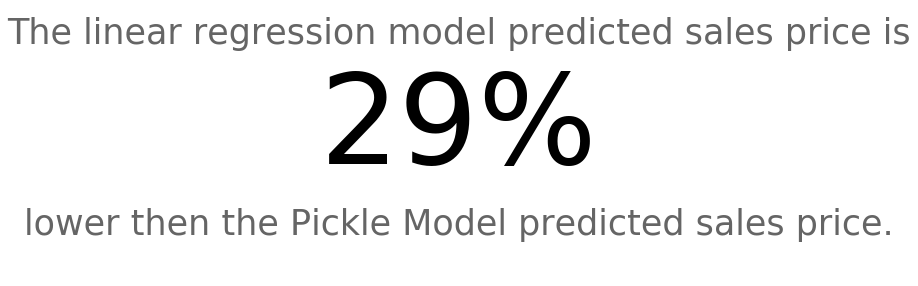

In [23]:
plt.figure(figsize=(8, 5))

plt.text(x = 0.5,                              
         y = 0.9,                              
         s = 'The linear regression model predicted sales price is', 
         ha = 'center',                        
         va = 'center',                        
         size = 35,                           
         alpha = 0.6)                          

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

plt.text(x = 0.5,
         y = 0.2,
         s = 'lower then the Pickle Model predicted sales price.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

plt.axis('off');


In [24]:
loaded_model = joblib.load('finalized_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.7591105662181187


**Evaluation of Model Score**
- The score of this Pickle Model is 0.75, the score of the Linear Regression Model is 0.81. Rules of thumb for the score are:
    - Closer to 1 desirable
    - Not scale dependent.
    - "A residual value of 0.8 means that 80% of the               variability in the data are explained by our model,             relative to a model with no predictors."
    - As you add more variables, residuals will never decrease     (with linear regression). 
    
- Assumptions: Less data renders a less accurate result. Less data lifts restraints, causing predictions to go up.